Chapter 10

# 二元线性回归
《线性代数》 | 鸢尾花书：数学不难

这段代码从数学的角度实现了**多元线性回归模型的拟合与三维可视化**。我们以二维输入变量 $x_1$ 与 $x_2$ 为例，生成了样本数据并构建回归平面 $\hat{y} = b_0 + b_1 x_1 + b_2 x_2$。下面逐段详细解析其中的数学原理。

---

首先，使用 `np.random.randn` 生成了一个包含 $100$ 个样本的二维输入矩阵 $x_{12} \in \mathbb{R}^{100 \times 2}$，每一行代表一个二维输入向量 $(x_{1i}, x_{2i})$。目标变量 $y \in \mathbb{R}^{100}$ 是通过线性关系生成的，包含高斯噪声项：

$$
y_i = -3 x_{1i} + 2 x_{2i} + 1 + \epsilon_i \quad \text{其中} \quad \epsilon_i \sim \mathcal{N}(0, 0.25^2)
$$

这模拟了真实世界中，因变量 $y$ 是输入变量 $x_1$ 和 $x_2$ 的线性组合，并受微小扰动的情况。

---

接下来构造**设计矩阵** $X \in \mathbb{R}^{100 \times 3}$，每一行是：

$$
X_i = [1, x_{1i}, x_{2i}]
$$

这一步通过在 $x_{12}$ 左侧添加一列常数 $1$ 完成，用以引入截距项 $b_0$，使得回归模型具有形式：

$$
\hat{y} = X \mathbf{b} = b_0 + b_1 x_1 + b_2 x_2
$$

---

然后使用**正规方程（Normal Equation）**求解回归系数向量 $\mathbf{b}$：

$$
\mathbf{b} = (X^\top X)^{-1} X^\top y
$$

这是一种解析解法，基于最小二乘原理，目标是最小化残差平方和：

$$
\min_{\mathbf{b}} \| X \mathbf{b} - y \|_2^2
$$

得出的系数 $\mathbf{b} = [b_0, b_1, b_2]^\top$ 即为最佳拟合的平面参数。

---

随后，构建一个 $10 \times 10$ 的二维网格 $(x_1, x_2)$：

$$
(x_1, x_2) \in [-3, 3] \times [-3, 3]
$$

并将其展平为 $100$ 个二维点，构成 $X_{\text{grid}}$，同样增加一列全 $1$ 用于计算模型预测值：

$$
\hat{y}_{\text{grid}} = X_{\text{grid}} \mathbf{b}
$$

然后将预测值 $\hat{y}_{\text{grid}}$ 重新 reshape 为二维形状，用于绘制回归平面。

---

最后使用 `matplotlib` 的 3D 绘图工具，绘制以下两类图像：

1. 三维散点图：展示原始样本点 $(x_1, x_2, y)$，体现真实分布。
2. 回归线框图：展示拟合出的平面 $\hat{y} = b_0 + b_1 x_1 + b_2 x_2$。

通过这种方式，可以**直观地观察拟合效果**，理解回归平面是如何“穿过”点云，并体现其在三维空间中的“最佳近似”。

---

整体上，这段代码从头构建了一个**二维输入变量的线性回归模型**，并以几何视角展示了线性模型的拟合过程，是线性回归教学中的典型范例。

## 初始化

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 创建数据

In [6]:
# 随机生成数据集
np.random.seed(0)
n_samples = 100
x_12 = np.random.randn(n_samples, 2)
y = -3 * x_12[:,0] + 2 * x_12[:,1] + 1 + 0.25*np.random.randn(n_samples)

In [7]:
# 构造设计矩阵，增加全1列向量
X = np.column_stack((np.ones_like(y), x_12))

## 创建线性回归模型并拟合数据

In [9]:
b = np.linalg.inv(X.T @ X) @ X.T @ y
b

array([ 0.98714722, -2.97238377,  1.98649073])

## 拟合

In [11]:
# 生成回归平面的数据点
x1_grid, x2_grid = np.meshgrid(np.linspace(-3, 3, 10), 
                               np.linspace(-3, 3, 10))
X_grid=np.column_stack((x1_grid.flatten(),x2_grid.flatten()))

In [12]:
X_grid = np.column_stack((np.ones_like(X_grid[:,[0]]), X_grid))
# 预测回归平面上的响应变量
y_pred = X_grid @ b
y_pred = y_pred.reshape(x1_grid.shape)

## 可视化

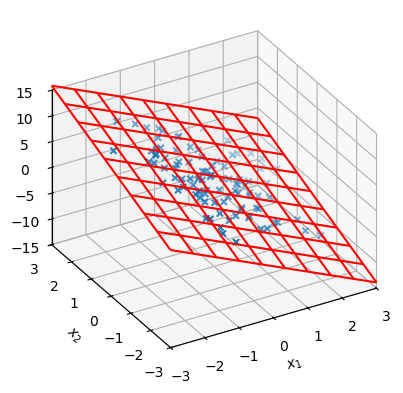

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 绘制三维样本散点
ax.scatter(x_12[:,0], x_12[:,1], y, marker = 'x')

# 绘制回归平面
ax.plot_wireframe(x1_grid, x2_grid, y_pred, colors = 'r')

ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$')
ax.set_zlabel('y')
ax.set_xlim([-3,3]); ax.set_ylim([-3,3])
ax.set_zlim([-15,15])
ax.set_proj_type('ortho'); ax.view_init(azim=-120, elev=30)

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  